In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.ndimage import convolve, gaussian_filter
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

# Load the MNIST dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

ModuleNotFoundError: No module named 'cv2'

In [ ]:
! pip install opencv-python

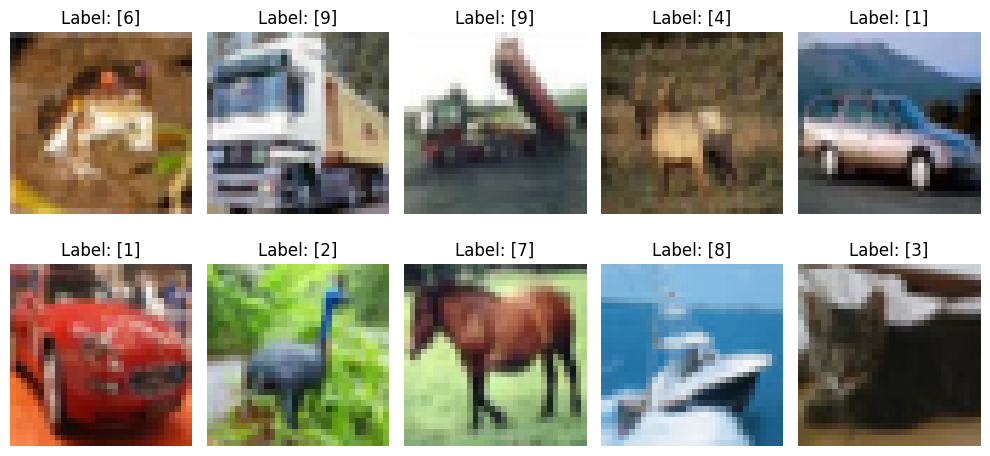

In [ ]:
def visualize_image(image,label = None):
    plt.figure(figsize=(10, 5))
    # for i in range(num_images):
        # plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    if label is not None:
      plt.title(f'Label: {label}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first 10 images and their labels
visualize_images(train_images, train_labels, num_images=10)

In [ ]:
import random
random.seed(42)
np.random.seed(42)
def create_uniform_gabor_kernels(ksize=3, theta_steps=5, sigma_steps=3):
    theta_values = np.linspace(0, np.pi, theta_steps)
    sigma_values = np.linspace(1.0, 10, sigma_steps)

    gabor_kernels = []

    for theta in theta_values:
        for sigma in sigma_values:
            lambd = 10.0 / sigma  # Adjust lambda based on sigma for better visualization
            gamma = 0.5  # Fixed gamma value
            psi = np.pi / 2  # Fixed psi value

            gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
            gabor_kernels.append(gabor_kernel)

    return gabor_kernels

def apply_gabor_filters(patch, kernels):
    filtered_patches = []
    for kernel in kernels:
    # gabor_kernel = create_random_gabor_kernel(ksize=3)
      filtered_patch = cv2.filter2D(patch, cv2.CV_32F, kernel)
      filtered_patches.append(filtered_patch)
    return np.stack(filtered_patches, axis=-1)  # Stack along the last dimension to form a 4x4xN matrix

def divide_into_patches(image, patch_size=4):
    patches = []
    num_patches_x = image.shape[1] // patch_size
    num_patches_y = image.shape[0] // patch_size
    for i in range(num_patches_y):
        for j in range(num_patches_x):
            patch = image[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]
            patches.append(patch)
    return patches

def extract_gabor_features(image_batch,kernels, N=5, patch_size=4):
    all_gabor_features = []
    for image in image_batch:
        patches = divide_into_patches(image, patch_size)
        gabor_features = []
        for patch in patches:
            gabor_filtered_patch = apply_gabor_filters(patch, kernels)
            gabor_features.append(gabor_filtered_patch.flatten())  # Flatten the 4x4xN matrix into a vector

        all_gabor_features.append(np.concatenate(gabor_features))  # Concatenate all patch vectors into a single feature vector

    return np.array(all_gabor_features)  # Convert to a NumPy array for batch processing


def extract_gabor_features(image_batch, kernels, N=5, patch_size=4):
    all_gabor_features = []
    for image in image_batch:
        # patches = divide_into_patches(image, patch_size)
        gabor_features = apply_gabor_filters(image, kernels)
        all_gabor_features.append(gabor_features.flatten())

    return np.array(all_gabor_features)  # Convert to a NumPy array for batch processing

In [ ]:
train_images, train_labels = train_images[:], train_labels[:]
test_images, test_labels = test_images[:], test_labels[:]

In [ ]:
kernels = create_uniform_gabor_kernels(ksize=3, theta_steps=5, sigma_steps=3)

In [ ]:
train_features = extract_gabor_features(train_images, kernels)
print('Train feature vector shape: ', train_features.shape)

test_features = extract_gabor_features(test_images, kernels)
print("Test feature vector shape:", test_features.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_features)

# Transform training and test data
scaled_train_features = scaler.transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')
svm_model.fit(scaled_train_features, train_labels)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
predictions = svm_model.predict(scaled_test_features)

In [ ]:
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# You can also print a detailed classification report
print(classification_report(test_labels, predictions))

Accuracy: 0.23
              precision    recall  f1-score   support

           0       0.19      0.30      0.24        20
           1       0.28      0.36      0.31        14
           2       0.16      0.19      0.17        21
           3       0.00      0.00      0.00        19
           4       0.14      0.20      0.17        15
           5       0.28      0.28      0.28        18
           6       0.40      0.23      0.29        26
           7       0.09      0.06      0.07        18
           8       0.52      0.46      0.49        28
           9       0.31      0.19      0.24        21

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.23       200
weighted avg       0.26      0.23      0.24       200

